### Linear Regression - Boston Data

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import matplotlib.pyplot as plt
import seaborn as sns

### 1. Problem Statement

In [ ]:
Problem Statement: TO predict median value of owner-occupied homes in $1000s

crim:per capita crime rate by town.

zn:proportion of residential land zoned for lots over 25,000 sq.ft.

indus:proportion of non-retail business acres per town.

chas:Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox:nitrogen oxides concentration (parts per 10 million).

rm:average number of rooms per dwelling.

age:proportion of owner-occupied units built prior to 1940.

dis:weighted mean of distances to five Boston employment centres.

rad:index of accessibility to radial highways.

tax:full-value property-tax rate per $10,000.

ptratio:pupil-teacher ratio by town.

black:1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

lstat:lower status of the population (percent).

medv:median value of owner-occupied homes in $1000s.



### 2. Data Gathering

In [2]:
df = pd.read_csv("boston_data.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### 3. Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
df.PRICE

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

### Linearity

In [6]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [7]:
df.corr().tail(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
PRICE,-0.388305,0.360445,-0.483725,0.17526,-0.427321,0.69536,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663,1.0


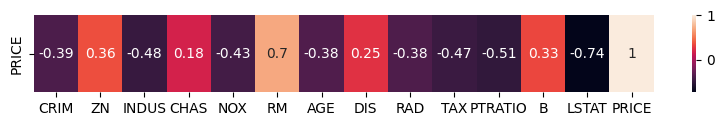

In [8]:
plt.figure(figsize = (10,1))
sns.heatmap(df.corr().tail(1), annot = True)
plt.savefig('Correlation.png')

### No Multicolinearity

In [9]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [10]:
x = df.drop('PRICE',axis = 1)
y = df['PRICE']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

### variance_inflation_factor

In [11]:
x.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [12]:
for idx in range(x.shape[1]):
    vif = variance_inflation_factor(x,idx)
    print("VIF :",vif)

VIF : 2.1003728199615233
VIF : 2.8440132669462637
VIF : 14.485757706539308
VIF : 1.1529518589418777
VIF : 73.89494652814788
VIF : 77.94828304638538
VIF : 21.38685048994314
VIF : 14.6996523837492
VIF : 15.167724857920897
VIF : 61.227274009649456
VIF : 85.02954731061801
VIF : 20.104942636229136
VIF : 11.102024772203539


<Axes: >

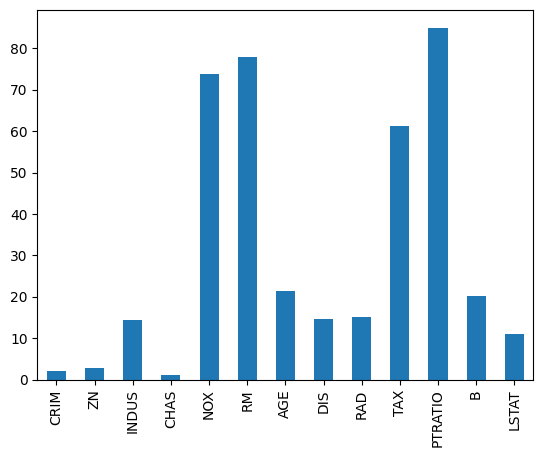

In [13]:
vif_list = []
for idx in range(x.shape[1]):
    vif = variance_inflation_factor(x,idx)
    # print("VIF :",vif)
    vif_list.append(vif)
s1 = pd.Series(vif_list, index = x.columns)
s1.plot(kind = 'bar')

<Axes: >

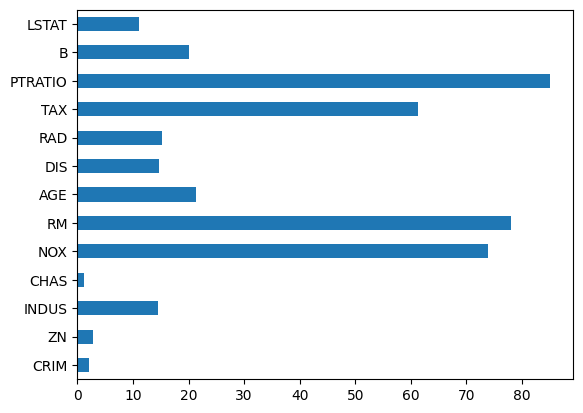

In [14]:
vif_list = []
for idx in range(x.shape[1]):
    vif = variance_inflation_factor(x,idx)
    vif_list.append(vif)
s1 = pd.Series(vif_list, index = x.columns)
s1.plot(kind = 'barh')

### Train Test Split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 23)

### Model Training

In [16]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [17]:
np.around(lin_reg.coef_,3)

array([-1.0200e-01,  4.7000e-02,  1.5000e-02,  3.3030e+00, -1.9726e+01,
        3.6440e+00,  5.0000e-03, -1.5110e+00,  2.7600e-01, -1.0000e-02,
       -8.9100e-01,  1.0000e-02, -5.5900e-01])

In [18]:
lin_reg.intercept_

37.01314334642487

### Model Evaluation

In [19]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
176,0.07022,0.0,4.05,0,0.510,6.020,47.2,3.5549,5,296,16.6,393.23,10.11
311,0.79041,0.0,9.90,0,0.544,6.122,52.8,2.6403,4,304,18.4,396.90,5.98
94,0.04294,28.0,15.04,0,0.464,6.249,77.3,3.6150,4,270,18.2,396.90,10.59
139,0.54452,0.0,21.89,0,0.624,6.151,97.9,1.6687,4,437,21.2,396.90,18.46
232,0.57529,0.0,6.20,0,0.507,8.337,73.3,3.8384,8,307,17.4,385.91,2.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...
352,0.07244,60.0,1.69,0,0.411,5.884,18.5,10.7103,4,411,18.3,392.33,7.79
91,0.03932,0.0,3.41,0,0.489,6.405,73.9,3.0921,2,270,17.8,393.55,8.20
320,0.16760,0.0,7.38,0,0.493,6.426,52.3,4.5404,5,287,19.6,396.90,7.20
376,15.28800,0.0,18.10,0,0.671,6.649,93.3,1.3449,24,666,20.2,363.02,23.24


In [20]:
y_test

176    23.2
311    22.1
94     20.6
139    17.8
232    41.7
       ... 
352    18.6
91     22.0
320    23.8
376    13.9
108    19.8
Name: PRICE, Length: 102, dtype: float64

In [21]:
y_pred = lin_reg.predict(x_test)
y_pred.shape

(102,)

In [22]:
y_pred[:5]

array([25.61587252, 27.12586692, 27.2088525 , 16.76603362, 38.00811547])

In [23]:
y_test[:5]

176    23.2
311    22.1
94     20.6
139    17.8
232    41.7
Name: PRICE, dtype: float64

##### mean_squared_error

In [24]:
((y_test - y_pred)**2).mean()

21.95347173153704

In [25]:
mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

r_squared = r2_score(y_test, y_pred)
print("R-Squared :",r_squared)

MSE : 21.95347173153704
R-Squared : 0.7451430642919578


In [28]:
lin_reg.score(x_test, y_test)

0.7451430642919578

In [29]:
lin_reg.score(x_train, y_train)

0.7377734707180098

#### Training Data Evaluation

In [30]:
y_pred_train = lin_reg.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

r_squared = r2_score(y_train, y_pred_train)
print("R-Squared :",r_squared)

MSE : 22.021884616145638
RMSE: 4.6927480878634045
R-Squared : 0.7377734707180098


#### Testing Data Evaluation

In [31]:
mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)

rmse = np.sqrt(mse)
print("RMSE:",rmse)

r_squared = r2_score(y_test, y_pred)
print("R-Squared :",r_squared)

MSE : 21.95347173153704
RMSE: 4.685453204497622
R-Squared : 0.7451430642919578


### Normality

In [32]:
residual = y_train - y_pred_train

<Axes: xlabel='PRICE', ylabel='Density'>

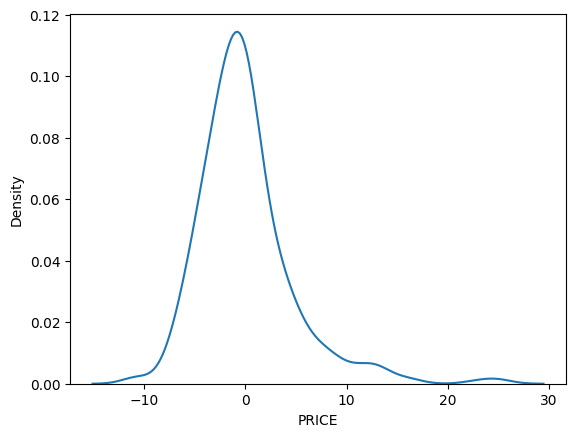

In [33]:
sns.kdeplot(residual)

<Axes: xlabel='PRICE', ylabel='Count'>

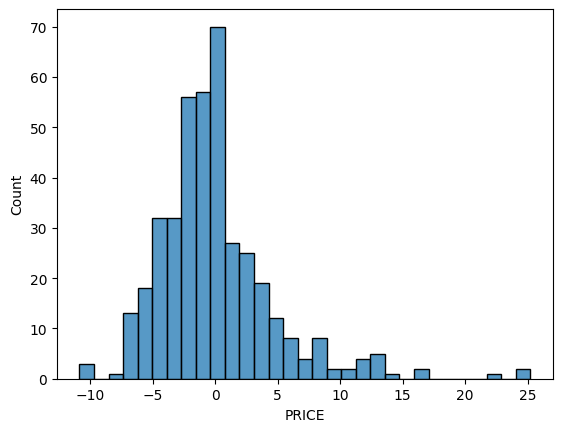

In [34]:
sns.histplot(residual)

<Axes: xlabel='PRICE', ylabel='Count'>

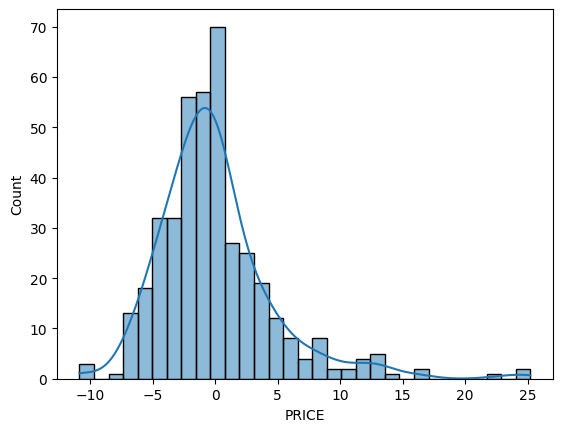

In [35]:
sns.histplot(residual, kde = True)